# Time Series Analysis using ARIMA

##### Loading the basic libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

##### Loading Electric Production data set

In [50]:
dataset = pd.read_csv("Downloads/Electric_Production.csv")

In [51]:
dataset.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [53]:
dataset.shape

(397, 2)

##### We need to convert them in to datetime datatype.

In [54]:
from datetime import datetime
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format = True)

C:\Users\Adil Jafferani\AppData\Local\Temp\ipykernel_1304\4031973086.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format = True)


In [55]:
Dataset = dataset.set_index('DATE', inplace = False)

In [56]:
Dataset.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


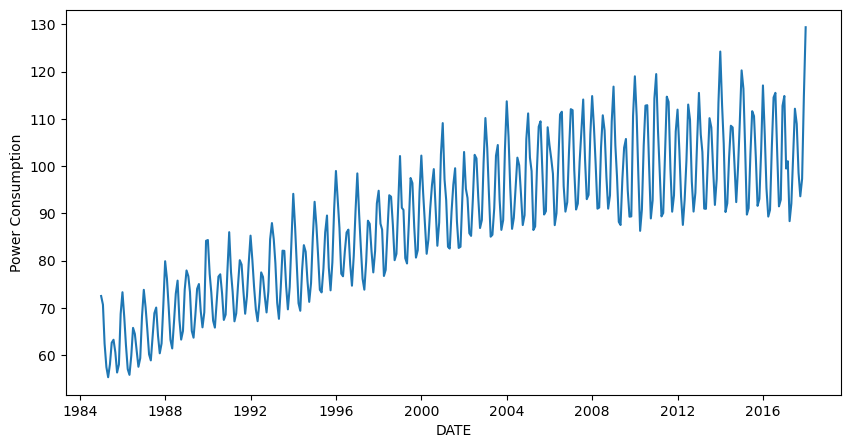

In [57]:
plt.figure(figsize=(10,5))
plt.xlabel('DATE')
plt.ylabel('Power Consumption')
plt.plot(Dataset)

#### Let's make one function consisting of stationary data checking and ADCF test working. Because we will need to repeat the steps many times, therefore, making function will become very handy.

In [82]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    elecom_test = adfuller(timeseries['Value'], autolag='AIC')
    dfoutput = pd.Series(elecom_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in elecom_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

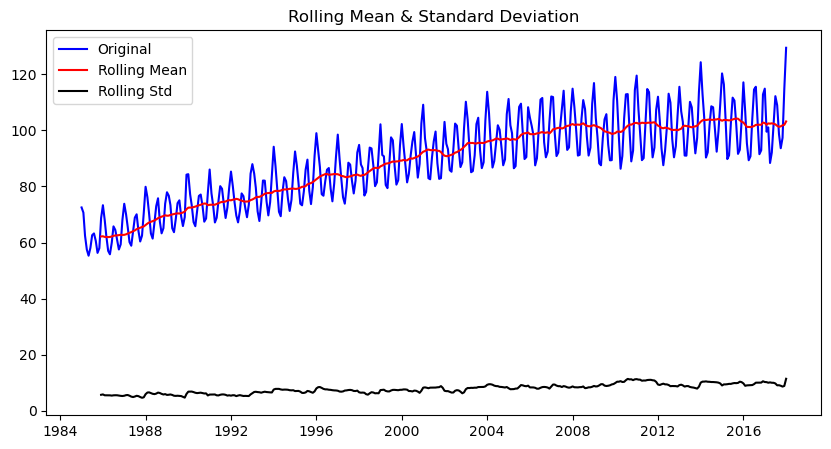

Results of Dickey Fuller Test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of Observations Used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [85]:
test_stationarity(Dataset)

#### From the above ADCF test result, we can see that p-value(near to 0.18) is very large. Also critical values lower than Test Statistics

#### Hence, we can safely say that our Time Series at the moment is NOT STATIONARY

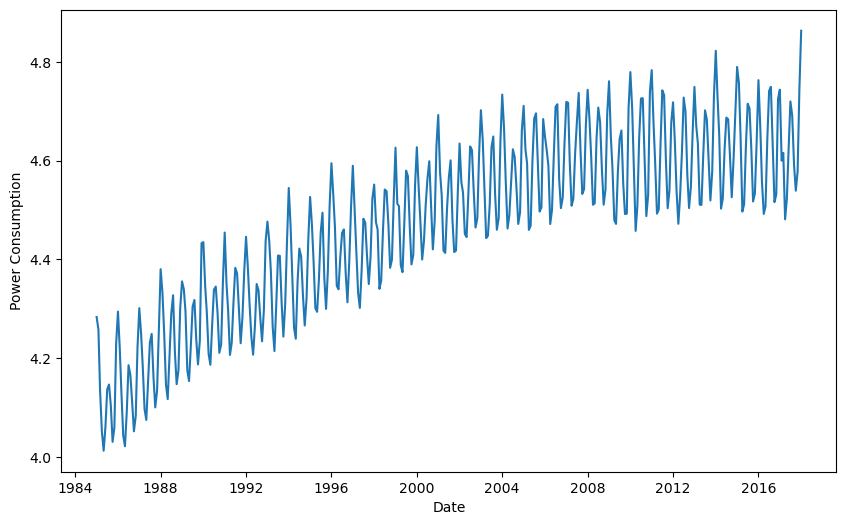

In [91]:
Dataset_log  = np.log(Dataset)
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.plot(Dataset_log)

In [92]:
rolmean_log = Dataset_log.rolling(window = 12).mean()

rolstd_log = Dataset_log.rolling(window = 12).std()
print(rolmean_log, rolstd_log)

               Value
DATE                
1985-01-01       NaN
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
...              ...
2017-09-01  4.613704
2017-10-01  4.615619
2017-11-01  4.619515
2017-12-01  4.620945
2018-01-01  4.630888

[397 rows x 1 columns]                Value
DATE                
1985-01-01       NaN
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
...              ...
2017-09-01  0.090198
2017-10-01  0.088161
2017-11-01  0.085080
2017-12-01  0.087140
2018-01-01  0.106964

[397 rows x 1 columns]


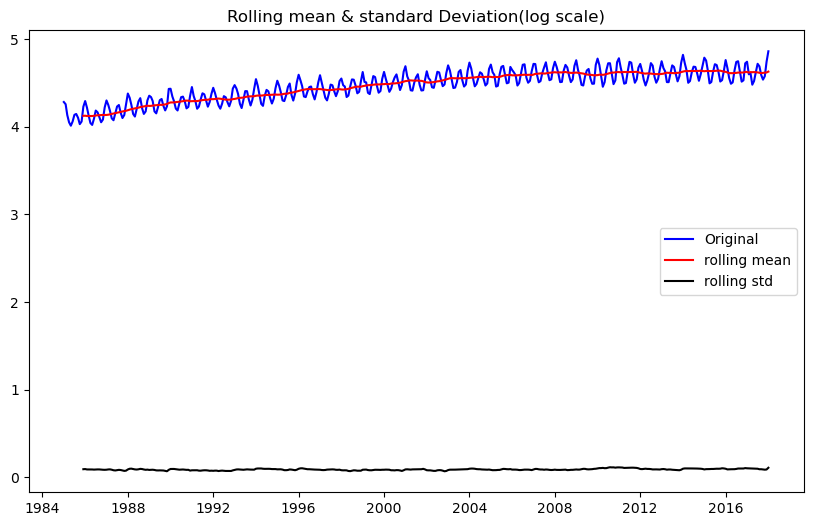

In [93]:
org = plt.plot(Dataset_log, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_log, color = 'red', label = 'rolling mean')
std = plt.plot(rolstd_log, color = 'black', label = 'rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & standard Deviation(log scale)')
plt.show(block = False)

In [94]:
rolnew = Dataset_logScale - movingAverage
rolnew.head()

,Value
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN


In [95]:
rolnew.dropna(inplace = True)
rolnew.head()

,Value
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115


In [64]:
yellow = '#e1f26b'
blue = '#4594a4'
green = '#9ccc84'
gray = '#d3e6ea'
lblue ='#9ccbd4'
white = '#FFFFFF'

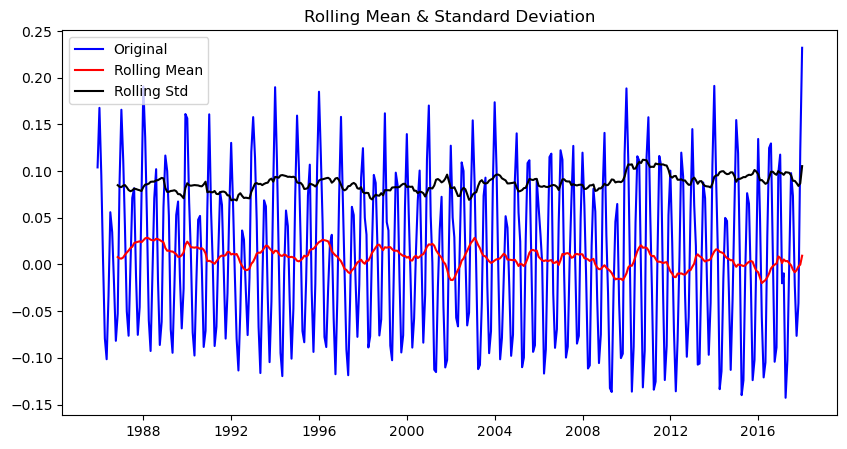

Results of Dickey Fuller Test:
Test Statistic                  -5.211586
p-value                          0.000008
#Lags Used                      15.000000
Number of Observations Used    370.000000
Critical Value (1%)             -3.448148
Critical Value (5%)             -2.869383
Critical Value (10%)            -2.570948
dtype: float64


In [97]:
test_stationarity(rolnew)

#### we can now say that given series is now STATIONARY

## Time Shift

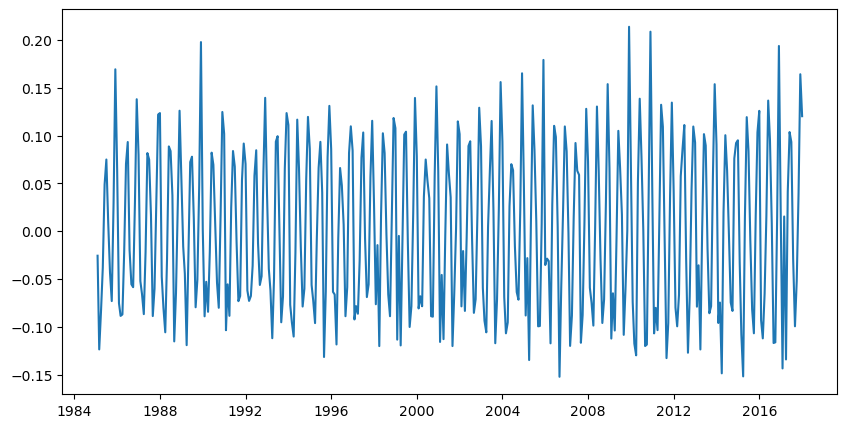

In [103]:
Dataset_log_diff = Dataset_log - Dataset_log.shift()
plt.figure(figsize = (10,5))
plt.plot(Dataset_log_diff)

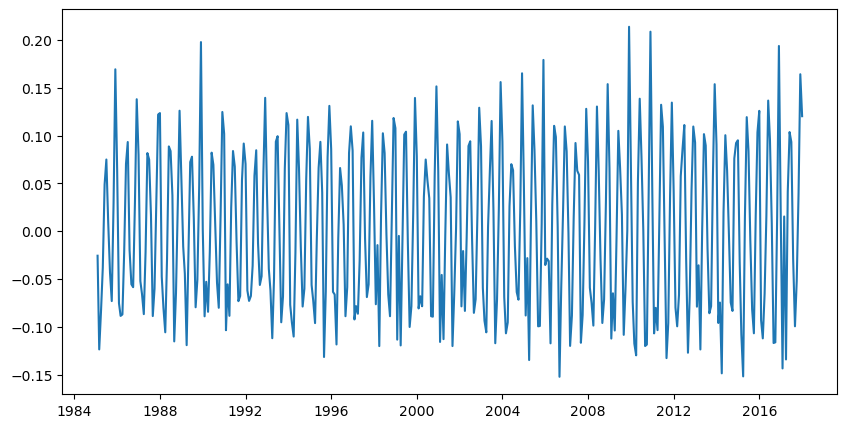

In [104]:
Dataset_log_diff.dropna(inplace = True)
plt.figure(figsize = (10,5))
plt.plot(Dataset_log_diff)

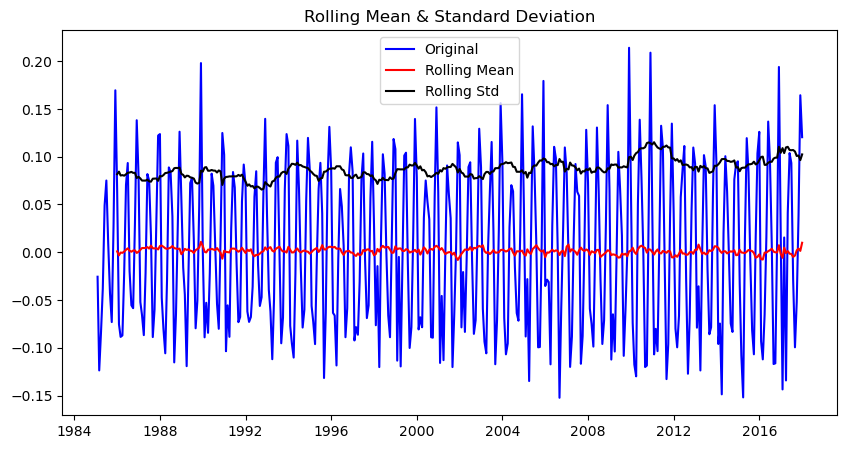

Results of Dickey Fuller Test:
Test Statistic                -6.748333e+00
p-value                        2.995161e-09
#Lags Used                     1.400000e+01
Number of Observations Used    3.810000e+02
Critical Value (1%)           -3.447631e+00
Critical Value (5%)           -2.869156e+00
Critical Value (10%)          -2.570827e+00
dtype: float64


In [105]:
test_stationarity(Dataset_log_diff)

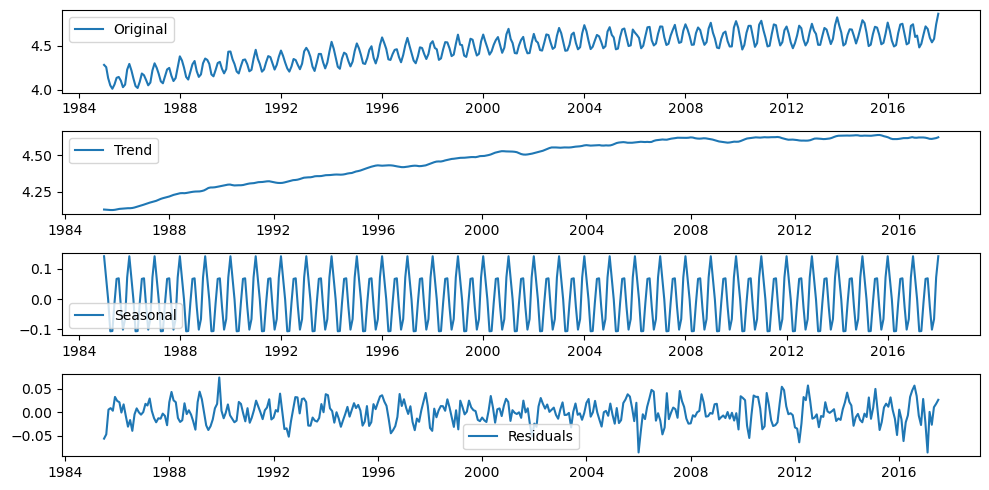

In [195]:
decomposition = seasonal_decompose(Dataset_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
std = plt.plot(Dataset_log, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
std = plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
std = plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')

plt.subplot(414)
std = plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [196]:
Dataset_decompose = residual
Dataset_decompose.dropna(inplace = True)

Text(0.5, 1.0, 'Rolling mean & standard Deviation(log scale)')

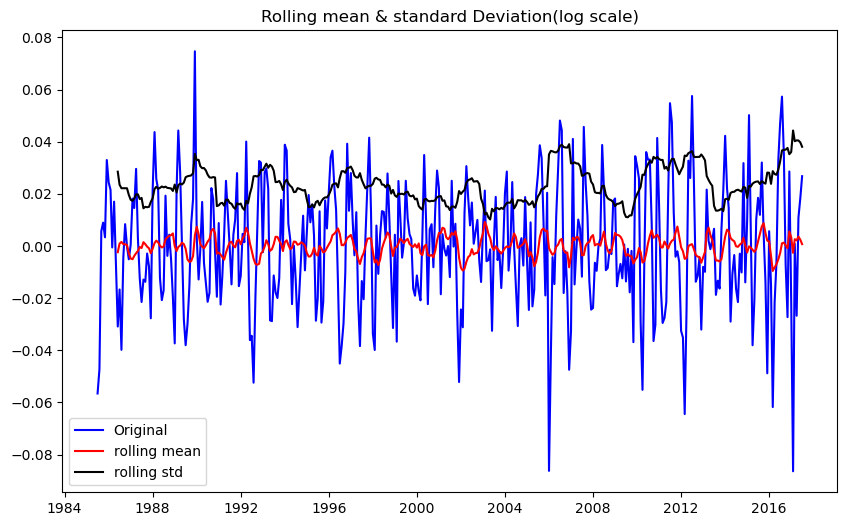

In [197]:
rolmean_decompose = Dataset_decompose.rolling(window = 12).mean()
rolstd_decompose = Dataset_decompose.rolling(window = 12).std()

org = plt.plot(Dataset_decompose, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_decompose, color = 'red', label = 'rolling mean')
std = plt.plot(rolstd_decompose, color = 'black', label = 'rolling std')
plt.legend(loc='best')
plt.title('Rolling mean & standard Deviation(log scale)')

## Plotting ACF & PACF

In [198]:
lag_acf = acf(Dataset_log_diff, nlags=20)
lag_pacf = pacf(Dataset_log_diff, nlags=20, method = 'ols')

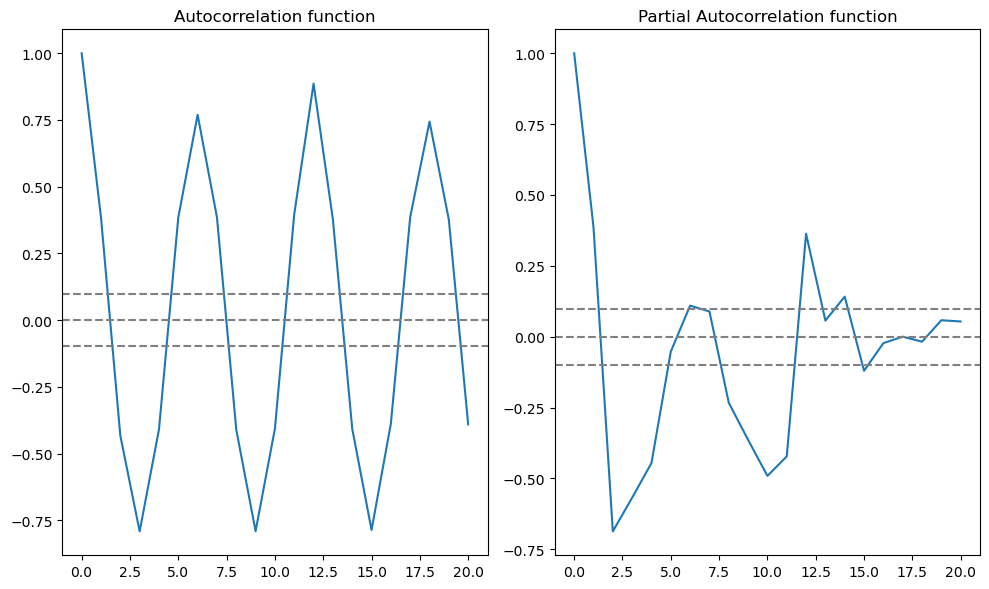

In [199]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(Dataset_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(Dataset_log_diff)), linestyle = '--', color = 'gray')
plt.title("Autocorrelation function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(Dataset_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(Dataset_log_diff)), linestyle = '--', color = 'gray')
plt.title("Partial Autocorrelation function")

plt.tight_layout()

## AR Model
Making order = (3,1,0)

C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


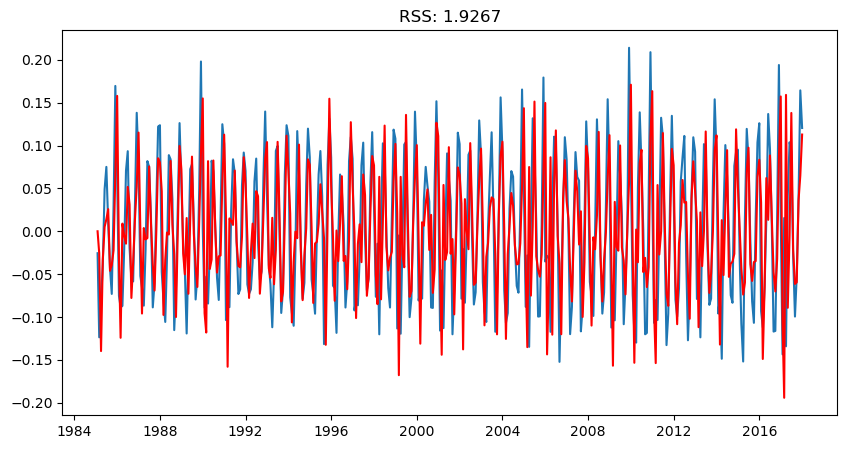

In [200]:
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(Dataset_log_diff, order=(3,1,0))
results_AR = model1.fit()
plt.figure(figsize=(10,5))
plt.plot(Dataset_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - Dataset_log_diff['Value'])**2))
print('Plotting AR model')

## MA Model
Making order = (0,1,3)

C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Plotting AR model


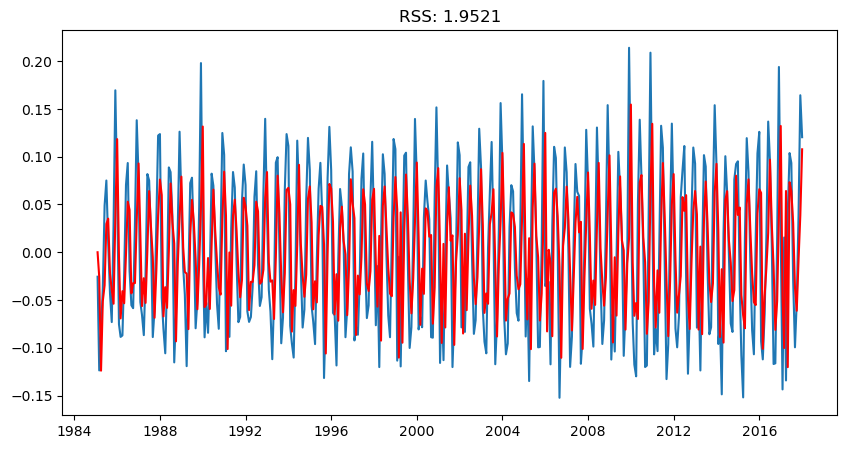

In [176]:
model2 = ARIMA(Dataset_log_diff, order=(0,1,3))
results_MA = model2.fit()
plt.figure(figsize=(10,5))
plt.plot(Dataset_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - Dataset_log_diff['Value'])**2))
print('Plotting AR model')

## AR+I+MA = ARIMA Model
Making order = (3,1,3)

C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Adil Jafferani\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting AR model


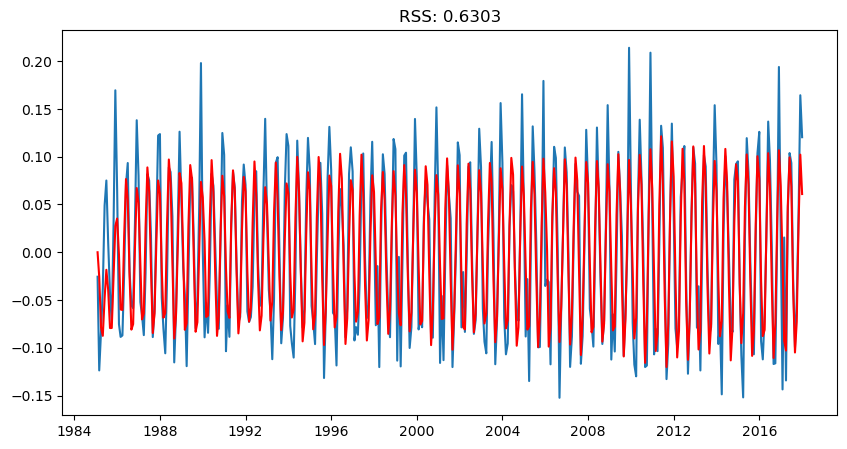

In [177]:
model3 = ARIMA(Dataset_log_diff, order=(3,1,3))
results_Arima = model3.fit()
plt.figure(figsize=(10,5))
plt.plot(Dataset_log_diff)
plt.plot(results_Arima.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_Arima.fittedvalues - Dataset_log_diff['Value'])**2))
print('Plotting AR model')

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 0.6303, indicating ARIMA to be better than its individual component models.

## Prediction & Reverse Transformation

In [178]:
predictions_Arima_diff = pd.Series(results_Arima.fittedvalues, copy=True)
predictions_Arima_diff.head()

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.078698
1985-05-01   -0.087462
1985-06-01   -0.048158
dtype: float64

In [179]:
predictions_ARIMA_diff_cumsum = predictions_Arima_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

DATE
1985-02-01    0.000000
1985-03-01   -0.025609
1985-04-01   -0.104307
1985-05-01   -0.191769
1985-06-01   -0.239926
dtype: float64

In [180]:
predictions_ARIMA_log = pd.Series(Dataset_log['Value'].iloc[0], index=Dataset_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

DATE
1985-01-01    4.283658
1985-02-01    4.283658
1985-03-01    4.258049
1985-04-01    4.179351
1985-05-01    4.091890
dtype: float64

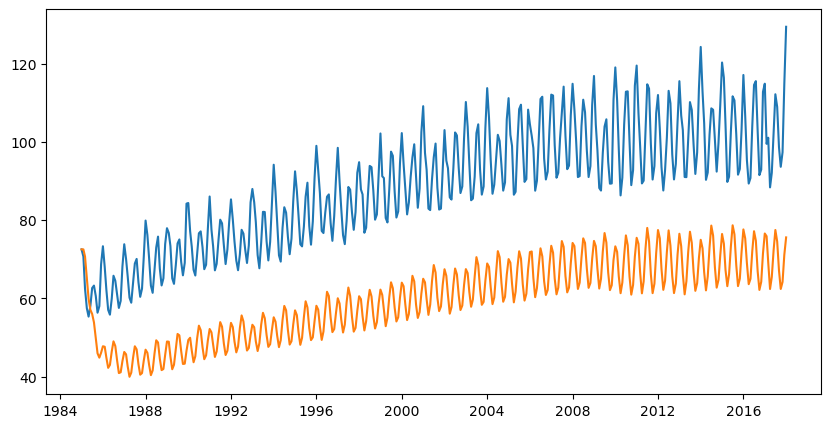

In [181]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(10,5))
plt.plot(Dataset)
plt.plot(predictions_ARIMA)

In [182]:
Dataset_log.head()

,Value
DATE,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046


In [184]:
Dataset_log.shape

(397, 1)

In [193]:
x = results_Arima.forecast(steps = 120)
x

2018-02-01   -0.035804
2018-03-01   -0.097194
2018-04-01   -0.066232
2018-05-01    0.042632
2018-06-01    0.115098
                ...   
2027-09-01   -0.052383
2027-10-01   -0.021560
2027-11-01    0.038800
2027-12-01    0.068145
2028-01-01    0.037515
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64